# Topic Modeling

# Latent Dirichlet allocation

### Building a topic model

In [21]:
import matplotlib.pyplot as plt
from gensim import corpora, models
corpus = corpora.BleiCorpus('./data/ap/ap.dat','./data/ap/vocab.txt')

In [22]:
model = models.ldamodel.LdaModel(corpus,num_topics=100,id2word=corpus.id2word)

C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


In [23]:
model = models.ldamodel.LdaModel(
 corpus, num_topics=100, id2word=corpus.id2word, alpha=None)

C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


In [24]:
doc = corpus.docbyoffset(0)

In [25]:
topics = model[doc]

In [26]:
print(topics)

[(4, 0.01063101), (15, 0.27982143), (18, 0.024300583), (20, 0.019983044), (28, 0.10417092), (29, 0.08003845), (35, 0.044953406), (41, 0.012412736), (56, 0.07641432), (64, 0.0111433035), (70, 0.013479184), (77, 0.016834877), (78, 0.018887449), (96, 0.24664587)]


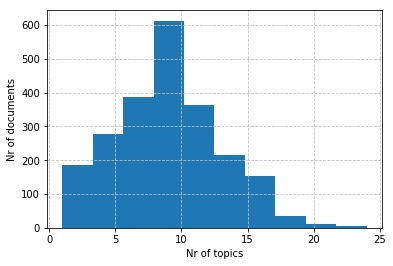

In [41]:
num_topics_used = [len(model[doc]) for doc in corpus]
plt.hist(num_topics_used)
plt.ylabel('Nr of documents')
plt.xlabel('Nr of topics')
plt.grid(True, linestyle='--', color='0.75')

In [28]:
>>> model1 = models.ldamodel.LdaModel(corpus,num_topics=100,id2word=corpus.id2word,alpha=1)

C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


In [31]:
>>> doc = corpus.docbyoffset(0)
>>> topics = model1[doc]
>>> print(topics)

[(0, 0.014960976), (1, 0.010044766), (7, 0.010974303), (9, 0.021709058), (16, 0.048618242), (18, 0.017672114), (20, 0.011022881), (25, 0.010863081), (26, 0.010815256), (31, 0.012058437), (32, 0.011857695), (33, 0.041664764), (34, 0.012474888), (35, 0.0129204765), (39, 0.018315567), (44, 0.020494258), (47, 0.011046607), (56, 0.011313099), (63, 0.030014172), (67, 0.013441459), (69, 0.025297819), (72, 0.027358681), (74, 0.01564302), (76, 0.013356662), (79, 0.013075413), (82, 0.014971686), (83, 0.013935621), (91, 0.010196722), (95, 0.02750668), (97, 0.018788699), (99, 0.011696437)]


Text(15,156,'alpha=1.0')

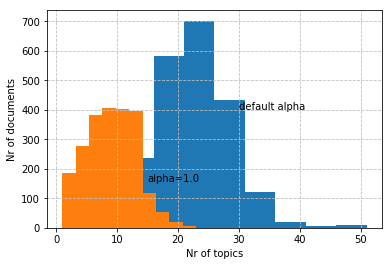

In [32]:
>>> num_topics_used1 = [len(model1[doc]) for doc in corpus]
>>> plt.hist(num_topics_used1)
plt.hist(num_topics_used)
plt.ylabel('Nr of documents')
plt.xlabel('Nr of topics')
plt.grid(True, linestyle='--', color='0.75')
plt.text(30, 400, r'default alpha')
plt.text(15, 156, 'alpha=1.0')

### Comparing documents by topics

In [33]:
>>> from gensim import matutils
>>> topics = matutils.corpus2dense(model[corpus],num_terms=model.num_topics)

In [34]:
>>> from scipy.spatial import distance
>>> pairwise = distance.squareform(distance.pdist(topics))

In [35]:
>>> largest = pairwise.max()
>>> for ti in range(len(topics)):
        pairwise[ti,ti] = largest+1

In [36]:
>>> def closest_to(doc_id):
        return pairwise[doc_id].argmin()

In [37]:
closest_to(1)

42

## Modeling the whole of Wikipedia

In [39]:
from __future__ import print_function
import numpy as np
import gensim
from os import path



In [40]:
warned_of_error = False

def create_cloud(oname, words,maxsize=120, fontname='Lobster'):
    '''Creates a word cloud (when pytagcloud is installed)
    Parameters
    ----------
    oname : output filename
    words : list of (value,str)
    maxsize : int, optional
        Size of maximum word. The best setting for this parameter will often
        require some manual tuning for each input.
    fontname : str, optional
        Font to use.
    '''
    try:
        from pytagcloud import create_tag_image, make_tags
    except ImportError:
        if not warned_of_error:
            print("Could not import pytagcloud. Skipping cloud generation")
        return

    # gensim returns a weight between 0 and 1 for each word, while pytagcloud
    # expects an integer word count. So, we multiply by a large number and
    # round. For a visualization this is an adequate approximation.
    words = [(w,int(v*10000)) for w,v in words]
    tags = make_tags(words, maxsize=maxsize)
    create_tag_image(tags, oname, size=(1800, 1200), fontname=fontname)

In [38]:
import logging, gensim

In [17]:
logging.basicConfig(
 format='%(asctime)s : %(levelname)s : %(message)s',
 level=logging.INFO)

In [19]:
id2word = gensim.corpora.Dictionary.load_from_text(
 './data/wiki_en_output_wordids.txt.bz2')

In [22]:
mm = gensim.corpora.MmCorpus('./data/wiki_en_output_tfidf.mm')

2018-10-17 19:55:33,423 : INFO : initializing cython corpus reader from ./data/wiki_en_output_tfidf.mm
2018-10-17 19:55:33,463 : INFO : accepted corpus with 4537765 documents, 100000 features, 716303813 non-zero entries


In [ ]:
model = gensim.models.ldamodel.LdaModel(
 corpus=mm,
 id2word=id2word,
 num_topics=100,
 update_every=1,
 chunksize=10000,
 passes=1)

In [24]:
model.save('wiki_lda.pkl')

2018-10-18 17:36:36,355 : INFO : saving LdaState object under wiki_lda.pkl.state, separately None
2018-10-18 17:36:37,065 : INFO : saved wiki_lda.pkl.state
2018-10-18 17:36:37,270 : INFO : saving LdaModel object under wiki_lda.pkl, separately ['expElogbeta', 'sstats']
2018-10-18 17:36:37,290 : INFO : storing np array 'expElogbeta' to wiki_lda.pkl.expElogbeta.npy
2018-10-18 17:36:37,598 : INFO : not storing attribute id2word
2018-10-18 17:36:37,599 : INFO : not storing attribute state
2018-10-18 17:36:37,600 : INFO : not storing attribute dispatcher
2018-10-18 17:36:37,655 : INFO : saved wiki_lda.pkl


In [25]:
model = gensim.models.ldamodel.LdaModel.load('wiki_lda.pkl')

2018-10-18 17:36:37,671 : INFO : loading LdaModel object from wiki_lda.pkl
2018-10-18 17:36:38,138 : INFO : loading expElogbeta from wiki_lda.pkl.expElogbeta.npy with mmap=None
2018-10-18 17:36:38,235 : INFO : setting ignored attribute id2word to None
2018-10-18 17:36:38,236 : INFO : setting ignored attribute state to None
2018-10-18 17:36:38,237 : INFO : setting ignored attribute dispatcher to None
2018-10-18 17:36:38,240 : INFO : loaded wiki_lda.pkl
2018-10-18 17:36:38,242 : INFO : loading LdaState object from wiki_lda.pkl.state
2018-10-18 17:36:38,442 : INFO : loaded wiki_lda.pkl.state


In [27]:
topics = np.load('topics.npy', mmap_mode='r')
lens = (topics > 0).sum(axis=0)
print(np.mean(lens))

282305.58


In [28]:
lens = (topics > 0).sum(axis=1)
print('Mean number of topics mentioned: {0:.3}'.format(np.mean(lens)))
print('Percentage of articles mentioning less than 10 topics: {0:.1%}'.format(np
.mean(lens <= 10)))

Mean number of topics mentioned: 6.22
Percentage of articles mentioning less than 10 topics: 95.1%


In [29]:
weights = topics.sum(0)

In [30]:
words = model.show_topic(weights.argmax(), 64)

In [33]:
fraction_mention = np.mean(topics[:,weights.argmax()] > 0)
print("The most mentioned topics is mentioned in {:.1%} of documents.".format(fraction_mention))
total_weight = np.mean(topics[:,weights.argmax()])
print("It represents {:.1%} of the total number of words.".format(total_weight))
print()
print()
print()
# Retrieve the **least** heavily used topic and plot it as a word cloud:
words = model.show_topic(weights.argmin(), 64)
fraction_mention = np.mean(topics[:,weights.argmin()] > 0)
print("The least mentioned topics is mentioned in {:.1%} of documents.".format(fraction_mention))
total_weight = np.mean(topics[:,weights.argmin()])
print("It represents {:.1%} of the total number of words.".format(total_weight))
print()
print()
print()

The most mentioned topics is mentioned in 16.9% of documents.
It represents 5.8% of the total number of words.



The least mentioned topics is mentioned in 2.4% of documents.
It represents 0.1% of the total number of words.





In [44]:
create_cloud('Result.png', words, maxsize=250, fontname='Cardo')